In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
# Muat data dari URL
url = "https://gist.githubusercontent.com/nadirbslmh/93b62fdcfa694d4ec07bed9b3c94e401/raw/c07971341361e23fd4f3a880437c4d8e4ebcfafc/stock_trades.json"
data = pd.read_json(url)

data

,trade_id,stock_symbol,trade_date,trade_time,trade_price,trade_volume,buyer_id,seller_id,trade_type,currency
0,1,GOOGL,1/5/2017,3,675.51,501030,1,1,sell,EUR
1,2,NVDA,3/27/2017,13,559.39,51823,2,2,buy,ZAR
2,3,NFLX,11/7/2015,0,811.33,684430,3,3,sell,ZWL
3,4,MSFT,5/29/2017,22,231.21,237465,4,4,buy,IDR
4,5,JPM,11/8/2012,16,699.15,800344,5,5,buy,HRK
...,...,...,...,...,...,...,...,...,...,...
995,996,JPM,11/11/2014,19,208.69,54629,996,996,buy,CNY
996,997,GOOGL,9/24/2018,9,829.10,365834,997,997,sell,RUB
997,998,MSFT,5/2/2012,16,346.35,891372,998,998,sell,EUR
998,999,NVDA,10/9/2010,0,935.36,483631,999,999,sell,PKR


### Harga beli saham yang tertinggi dalam rupiah (IDR). Pastikan semua nilai transaksi sudah dikonversi dalam satuan rupiah.

In [65]:
data['trade_price'] * 15000

max_purchase_idr = data[data['trade_type'] == 'buy']['trade_price'].max()
print(f"Harga beli saham tertinggi dalam IDR: {max_purchase_idr:.2f} IDR")

Harga beli saham tertinggi dalam IDR: 996.87 IDR


### Perkembangan transaksi pembelian saham TSLA.

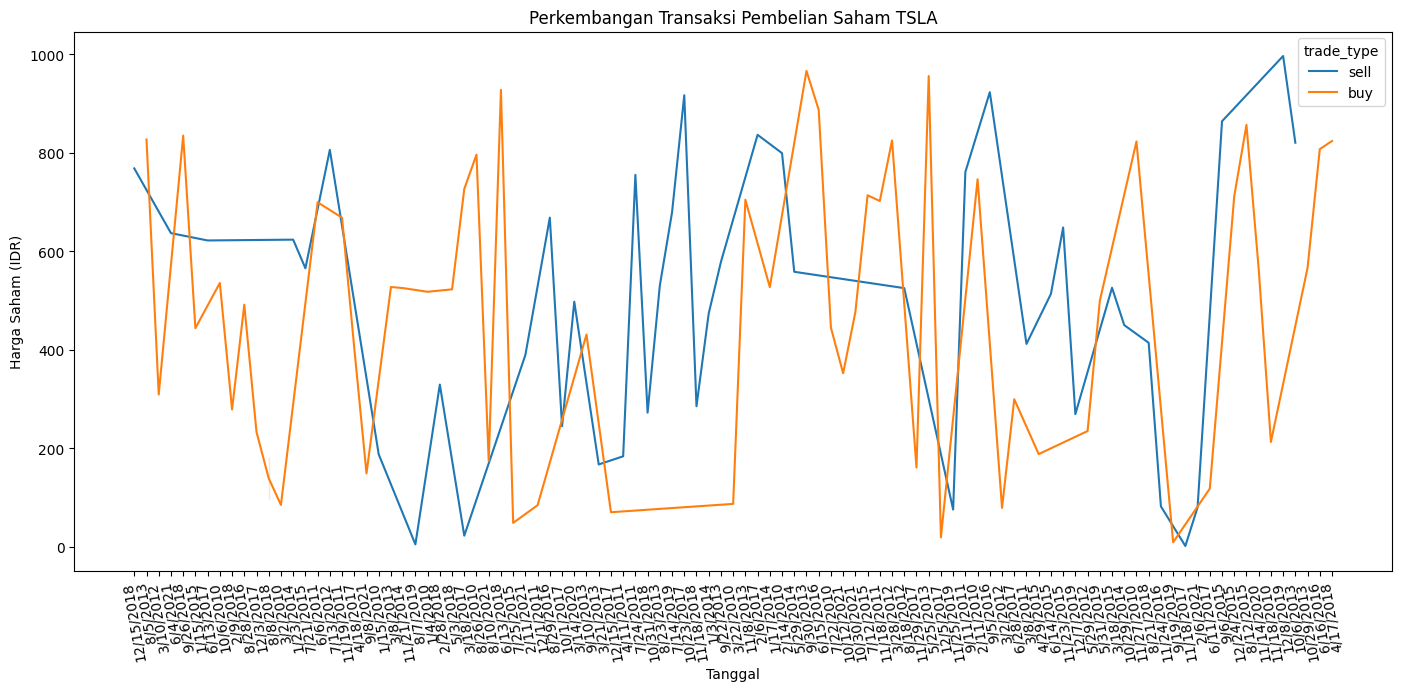

In [66]:
tsla_transactions = data[data['stock_symbol'] == 'TSLA']

plt.figure(figsize=(17, 7))
sns.lineplot(x=tsla_transactions['trade_date'], y=tsla_transactions['trade_price'], hue=tsla_transactions['trade_type'])
plt.title('Perkembangan Transaksi Pembelian Saham TSLA')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (IDR)')
plt.xticks(rotation=100)
plt.show()


### Persentase jenis saham yang dilakukan proses jual-beli. Jenis saham dapat dilihat pada bagian stock_symbol.

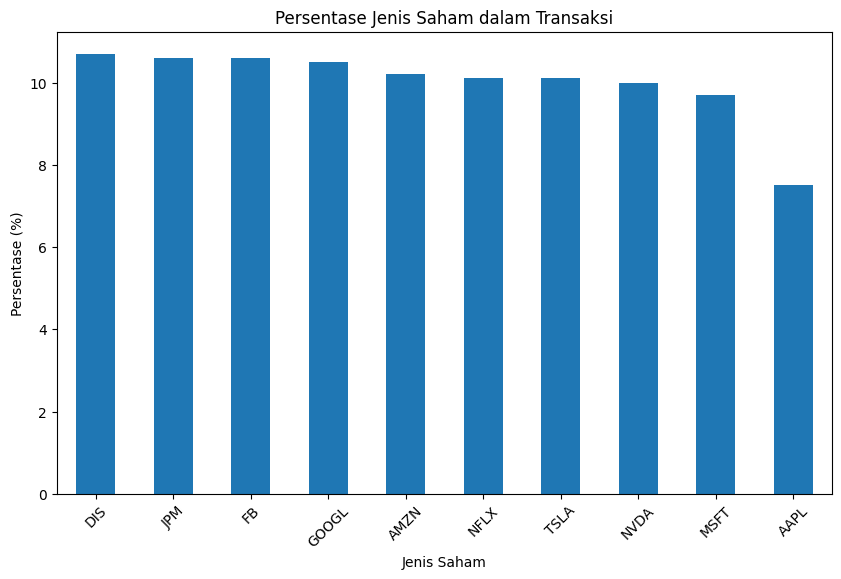

In [67]:
stock_type_percent = data['stock_symbol'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
stock_type_percent.plot(kind='bar')
plt.title('Persentase Jenis Saham dalam Transaksi')
plt.xlabel('Jenis Saham')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45)
plt.show()


### Jenis transaksi yang banyak dilakukan (buy / sell).

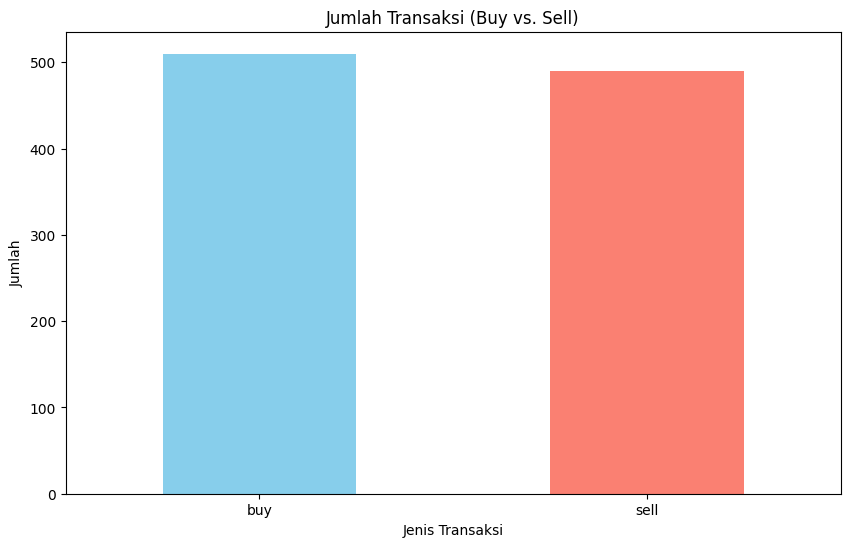

In [71]:
transaction_counts = data['trade_type'].value_counts()

plt.figure(figsize=(10, 6))
transaction_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Jumlah Transaksi (Buy vs. Sell)')
plt.xlabel('Jenis Transaksi')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()


### Persentase jenis transaksi yang dilakukan.

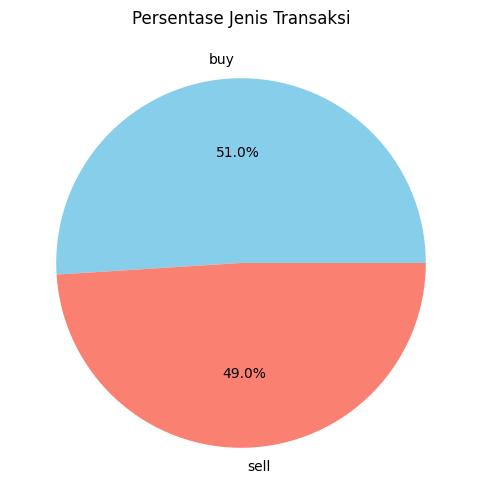

In [69]:
transaction_percent = data['trade_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
transaction_percent.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Persentase Jenis Transaksi')
plt.ylabel('')
plt.show()


### Rata-rata nilai transaksi jual pada setiap tahun untuk semua jenis saham.

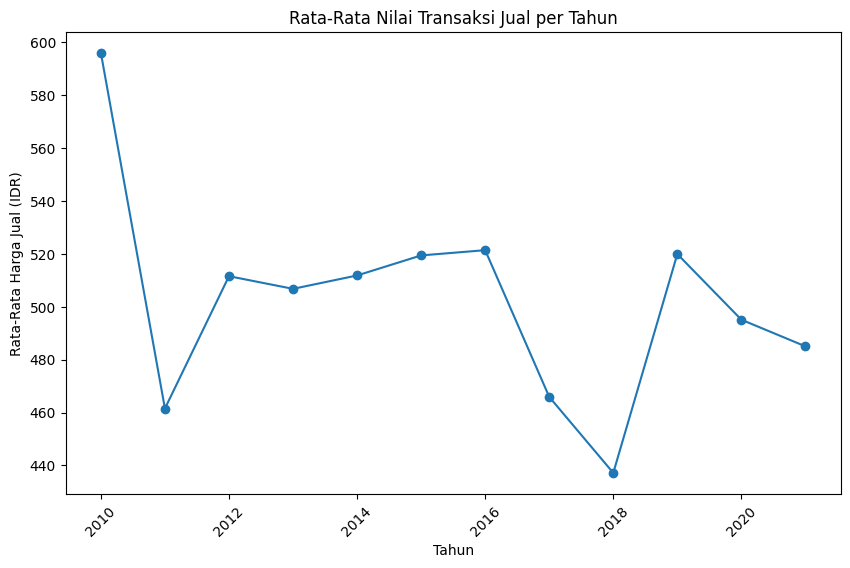

In [70]:
data['year'] = pd.to_datetime(data['trade_date']).dt.year

sell_transactions = data[data['trade_type'] == 'sell']

average_sell_by_year = sell_transactions.groupby('year')['trade_price'].mean()

plt.figure(figsize=(10, 6))
average_sell_by_year.plot(kind='line', marker='o')
plt.title('Rata-Rata Nilai Transaksi Jual per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Harga Jual (IDR)')
plt.xticks(rotation=45)
plt.show()
